In [7]:
import pandas as pd
import numpy as np
import time
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
from sklearn.utils import shuffle

In [8]:
df = pd.read_csv('DatasetPerovskitasJuan.csv') #Aqui lo que se hace es cargar los datos.

df1 = pd.read_csv('DatasetPerovskitasJuan1.csv') #Aqui lo que se hace es cargar los datos.
df1 = df1.dropna()
df1 = df1.drop_duplicates(subset=['full_formula'])
df1 = df1[df1['Nsites']<11]

df3 = pd.concat([df1, df], axis=0)
df3 = df3.drop_duplicates(subset=['full_formula'])

df3 = shuffle(df3, random_state=2)
df3 = df3.drop('volume-py', axis = 1)
df3 = df3.drop('density-py', axis = 1)
x = df.drop('Unnamed: 0', axis = 1)
x = x.drop('ID', axis = 1)
x = x.drop('full_formula', axis = 1)
x = x.drop('Energy', axis = 1)
x = x.drop('Energy_per_atom', axis = 1)
x = x.drop('Formation_energy_per_atom', axis = 1)
x = x.drop('E_above_hull', axis = 1)
x = x.drop("Band_gap",axis = 1) #Aqui quitamos la columna que correponde a la energia de gap
y = np.asarray(df['Energy']) #Aqui definimos la cantidad que deseamos predecir, en este caso la energia de gap
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
x = x.fillna(0)

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=9)

<function matplotlib.pyplot.show(close=None, block=None)>

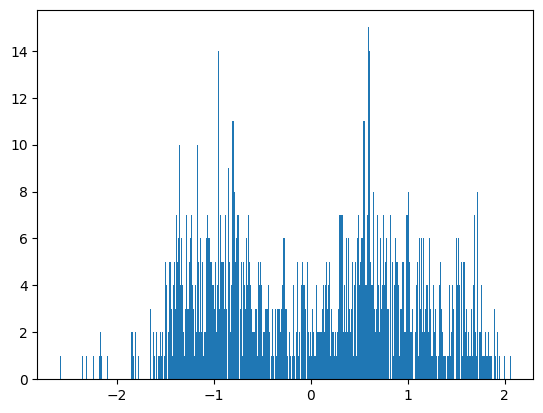

In [9]:
plt.hist(y, bins = 500)
plt.show

In [10]:
abr1 = GridSearchCV (AdaBoostRegressor (),{
    'random_state':[0,1,2], 'n_estimators':[1000], 'learning_rate':[0.001], 'loss': ['exponential']}, cv=5)
abr1.fit(X_train, y_train)
model = abr1.best_estimator_

Primero vemos las metricas
Model| R2 sq on train set: 0.8716
Model| R2 sq on test set: 0.8383
Model| MSE on test set: 0.1409
Model| MAE on test set: 0.2886
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

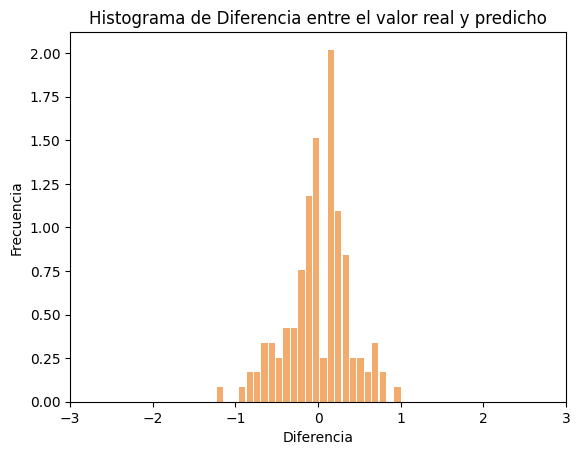

In [11]:
print('Primero vemos las metricas')
abr_score = model.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

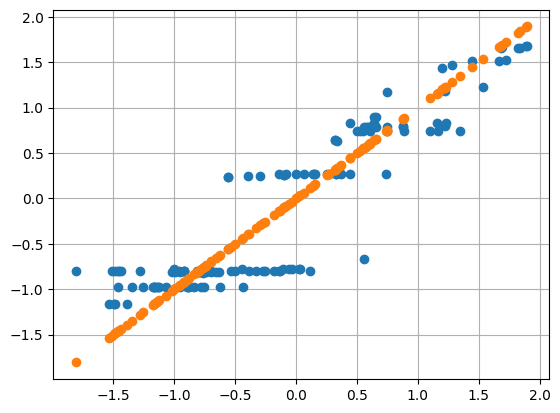

In [12]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [13]:
BR = GridSearchCV (linear_model.BayesianRidge(),{'tol':[1e-3]}, cv=5)
BR.fit(X_train, y_train) #Entrenamos el modelo
model1 = BR.best_estimator_ #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.9189
Model| R2 sq on test set: 0.9020
Model| MSE on test set: 0.0854
Model| MAE on test set: 0.2254
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

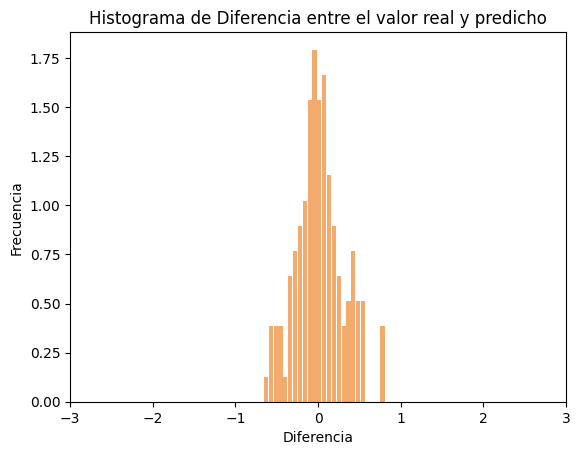

In [14]:
print('Primero vemos las metricas')
abr_score = model1.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model1.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model1.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

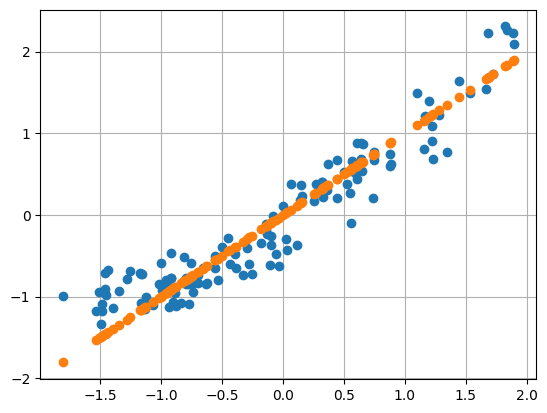

In [15]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [16]:
dtr1 = GridSearchCV (DecisionTreeRegressor(),{
    'criterion':['friedman_mse'], 'random_state':[0,1,2], 'splitter':['best'], 'max_depth':[None]}, cv=5, verbose = 3)
dtr1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model2 = dtr1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.928 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.945 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.952 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.928 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.907 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.928 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.948 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.955 total time=   0.0s
[CV 4/5] END

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.9513
Model| MSE on test set: 0.0424
Model| MAE on test set: 0.1170
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

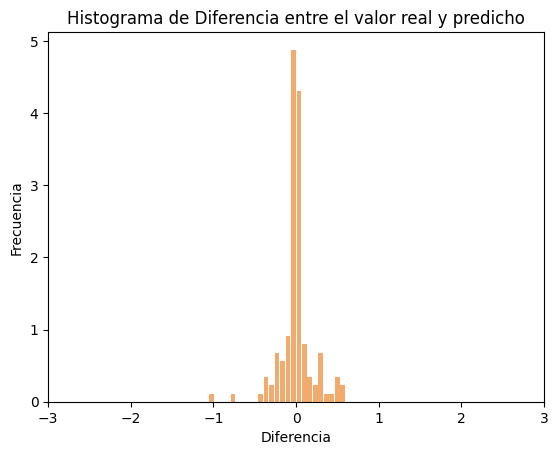

In [17]:
print('Primero vemos las metricas')
abr_score = model2.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model2.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model2.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

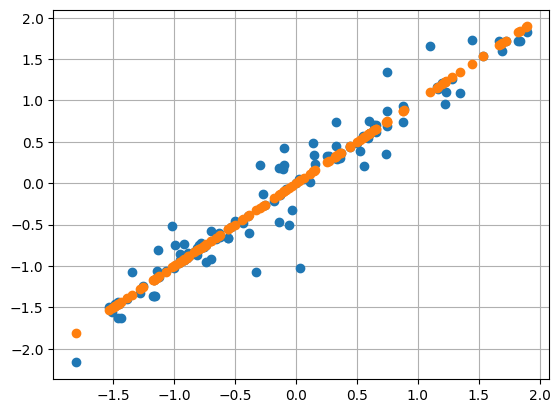

In [18]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [19]:
kernel = 15*RBF(1.0)+10*RBF(2.0)+5*RBF(3.0) #Definimos que tipo de kernel usar, en este caso uno contante de 15 y 2 tipo RBF
gpr1 = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel = kernel))
gpr1.fit(X_train, y_train) #Entrenamos el modelo
model3 = gpr1

c:\Users\Cronos\anaconda3\envs\kenai\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Cronos\anaconda3\envs\kenai\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Cronos\anaconda3\envs\kenai\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Cronos\an

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: -0.0109
Model| MSE on test set: 0.8808
Model| MAE on test set: 0.8004
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

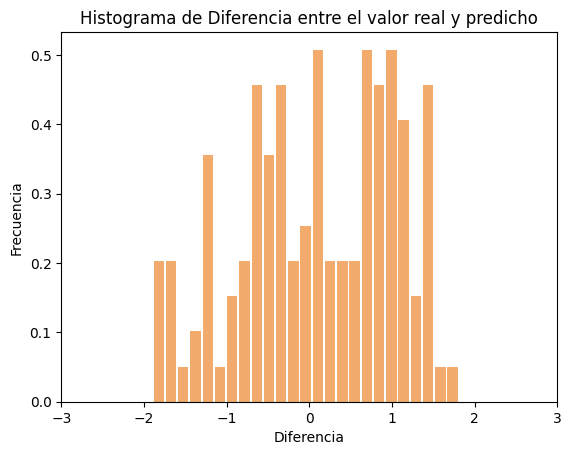

In [20]:
print('Primero vemos las metricas')
abr_score = model3.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model3.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model3.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

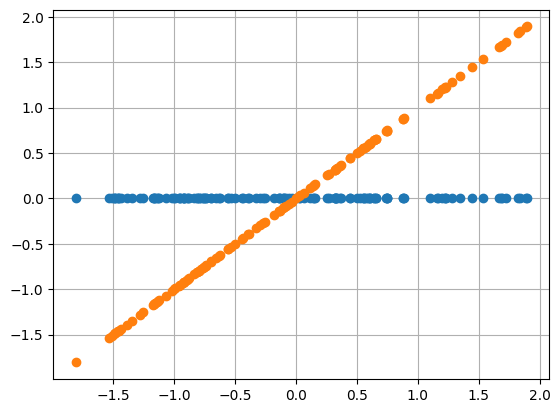

In [21]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [22]:
gbr = GridSearchCV(GradientBoostingRegressor (),{'n_estimators': [100,10,3], 'max_depth': [8], 'min_samples_split': [2], 'learning_rate': [0.1],
    'loss': ['squared_error'], 'random_state':[0,1,2]}, cv=5, verbose = 3)
#loss = 'ls', este es least squares
gbr.fit(X_train, y_train) #Entrenamos el modelo
model4 = gbr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.964 total time=   0.9s
[CV 2/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.965 total time=   0.9s
[CV 3/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.971 total time=   1.1s
[CV 4/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.960 total time=   1.0s
[CV 5/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.957 total time=   1.0s
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=1;, score=0.965 total time=   1.0s
[CV 2/5] END learning_rate=0

Primero vemos las metricas
Model| R2 sq on train set: 0.9999
Model| R2 sq on test set: 0.9776
Model| MSE on test set: 0.0195
Model| MAE on test set: 0.0854
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

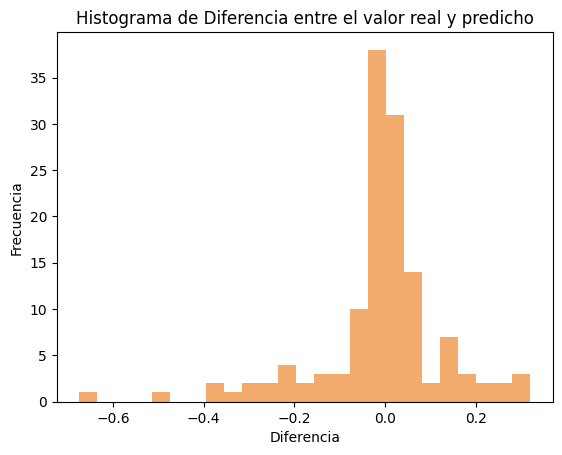

In [23]:
print('Primero vemos las metricas')
abr_score = model4.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model4.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model4.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D')
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
#plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

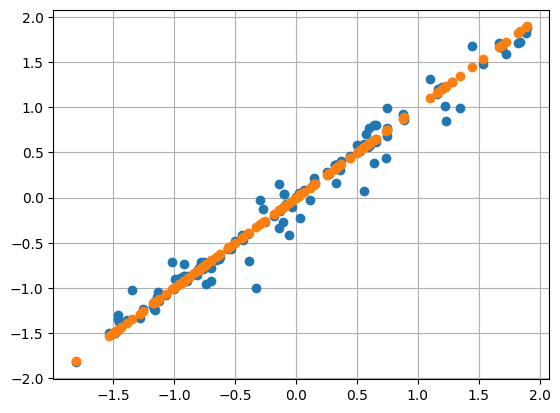

In [24]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

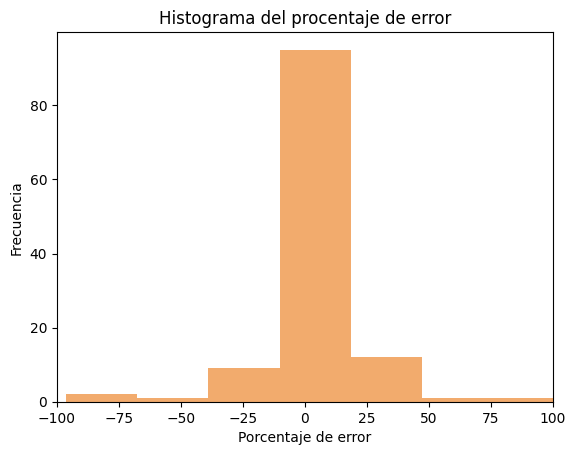

In [25]:
dif1 = (abs(yt - yp) / yt)*100
plt.hist(x=dif1, bins=50, color='#F2AB6D')
plt.title('Histograma del procentaje de error')
plt.xlabel('Porcentaje de error')
plt.ylabel('Frecuencia')
plt.xlim(-100,100)
#plt.xticks(range(-100,101,10))
plt.show

In [26]:
krr = GridSearchCV (KernelRidge (),{ 'alpha':[0.001],'kernel':['linear']}, cv=5,verbose=3)
krr.fit(X_train, y_train) #Entrenamos el modelo
model5 = krr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........alpha=0.001, kernel=linear;, score=0.916 total time=   0.0s
[CV 2/5] END ........alpha=0.001, kernel=linear;, score=0.913 total time=   0.0s
[CV 3/5] END ........alpha=0.001, kernel=linear;, score=0.911 total time=   0.0s
[CV 4/5] END ........alpha=0.001, kernel=linear;, score=0.895 total time=   0.0s
[CV 5/5] END ........alpha=0.001, kernel=linear;, score=0.703 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.9213
Model| R2 sq on test set: 0.9055
Model| MSE on test set: 0.0824
Model| MAE on test set: 0.2209
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

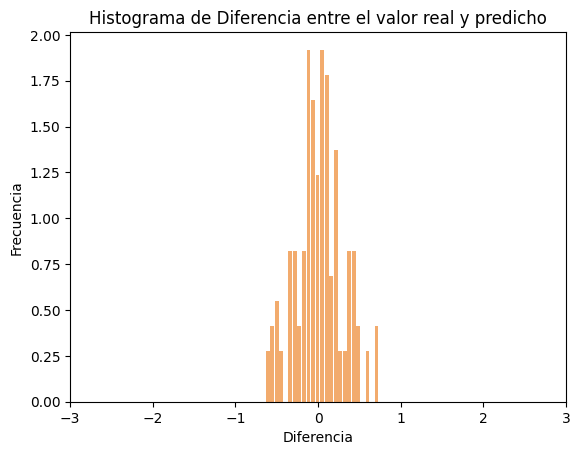

In [27]:
print('Primero vemos las metricas')
abr_score = model5.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model5.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model5.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

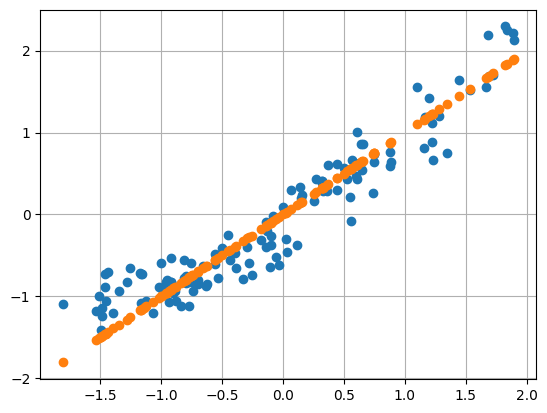

In [28]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [29]:
knr1 = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree')
knr1.fit(X_train, y_train)
model6 = knr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.9023
Model| MSE on test set: 0.0851
Model| MAE on test set: 0.1873
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

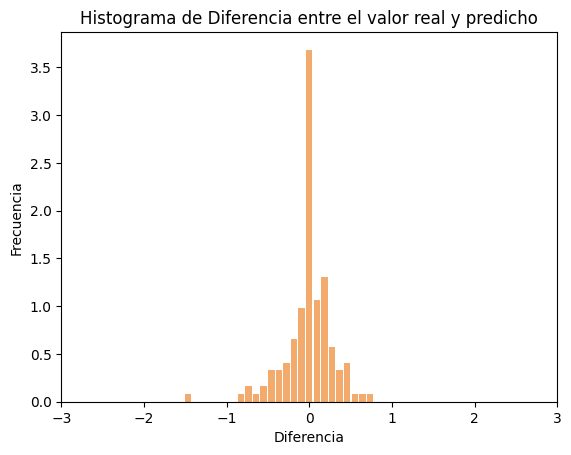

In [30]:
print('Primero vemos las metricas')
abr_score = model6.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model6.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model6.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

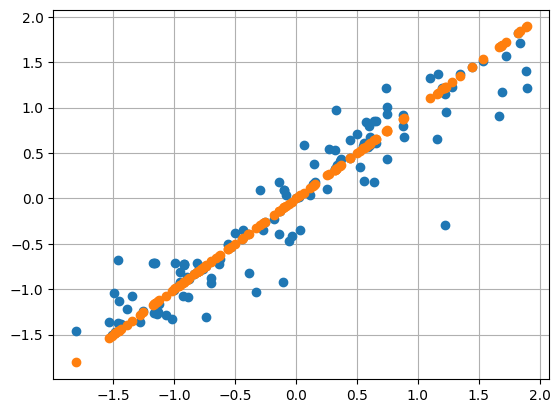

In [31]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [32]:
par = GridSearchCV (PassiveAggressiveRegressor(),{'max_iter':[1000], 'random_state':[10], 'tol':[1e-10]},
                   cv=5,verbose = 3)
#loss = 'ls', este es least squares
par.fit(X_train, y_train) #Entrenamos el modelo
model7 = par.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.768 total time=   0.0s
[CV 2/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.579 total time=   0.0s
[CV 3/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.859 total time=   0.0s
[CV 4/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.812 total time=   0.0s
[CV 5/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.603 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.7842
Model| R2 sq on test set: 0.7441
Model| MSE on test set: 0.2230
Model| MAE on test set: 0.3865
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

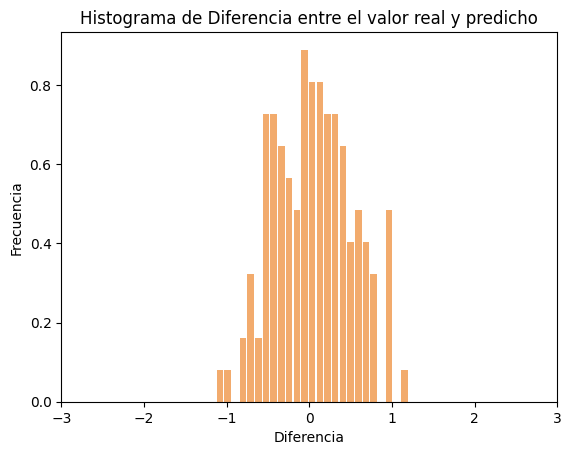

In [33]:
print('Primero vemos las metricas')
abr_score = model7.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model7.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model7.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

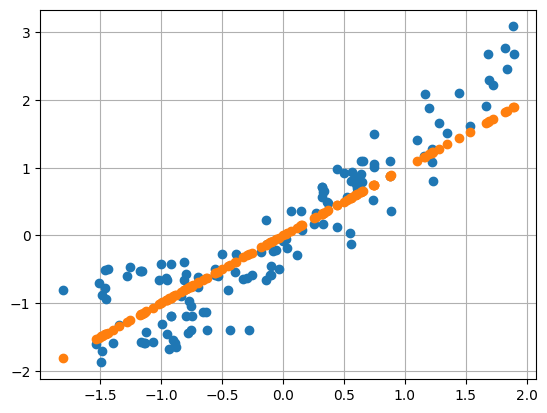

In [34]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [35]:
grid1 = GridSearchCV (RandomForestRegressor(),{'max_depth':[100], 'random_state':[0,1,2], 'criterion':['squared_error']
                                             }, cv=5, refit=True, verbose=3)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model8 = grid1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.961 total time=   1.1s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.959 total time=   1.0s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.970 total time=   1.1s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.966 total time=   1.0s
[CV 5/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.948 total time=   1.0s
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.962 total time=   1.0s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.960 total time=   1.0s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.970 total time=   1.0s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.965 total time=   1.1s
[CV 5/5] END criterion=squared_

Primero vemos las metricas
Model| R2 sq on train set: 0.9951
Model| R2 sq on test set: 0.9714
Model| MSE on test set: 0.0249
Model| MAE on test set: 0.1032
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

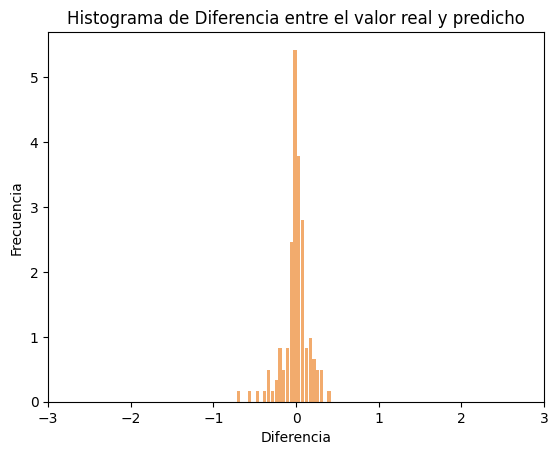

In [36]:
print('Primero vemos las metricas')
abr_score = model8.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model8.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model8.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

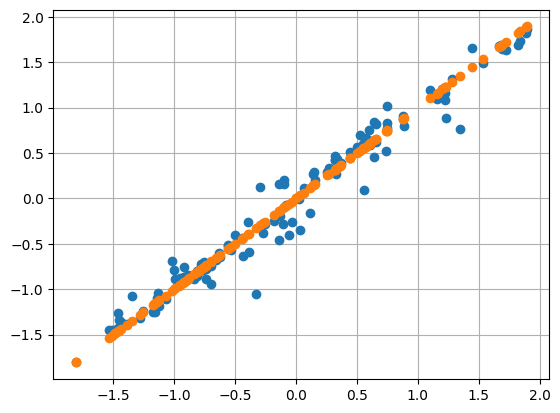

In [37]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [38]:
sgd = (make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,tol=1e-1500,alpha=0.0001,epsilon=0.0001)))
sgd.fit(X_train, y_train) #Entrenamos el modelo
model9 = sgd #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.3665
Model| R2 sq on test set: 0.7993
Model| MSE on test set: 0.1749
Model| MAE on test set: 0.3143
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

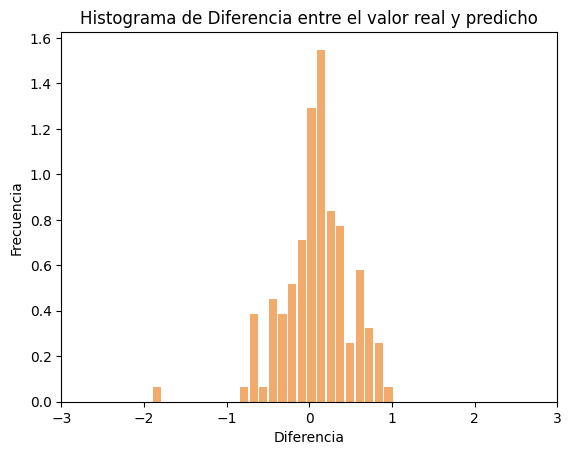

In [39]:
print('Primero vemos las metricas')
abr_score = model9.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model9.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model9.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

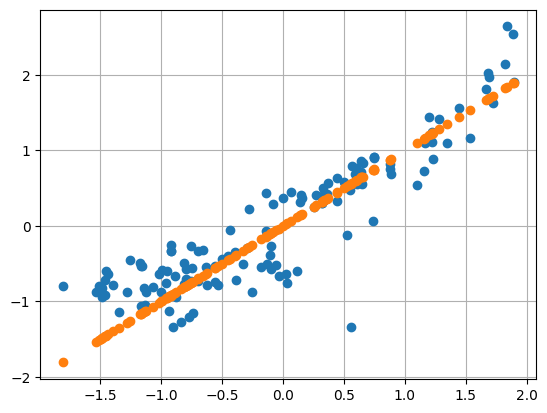

In [40]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [41]:
steps1 = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline1 = Pipeline(steps1) 
grid1 = GridSearchCV(pipeline1, param_grid= {'SVM__C':[100], 'SVM__gamma':['auto'], 'SVM__kernel': ['rbf'],
                                           'SVM__epsilon':[0.001]},cv = 5, refit=True,verbose=3, n_jobs = -1)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model10 = grid1.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.9968
Model| R2 sq on test set: 0.9684
Model| MSE on test set: 0.0275
Model| MAE on test set: 0.1025
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

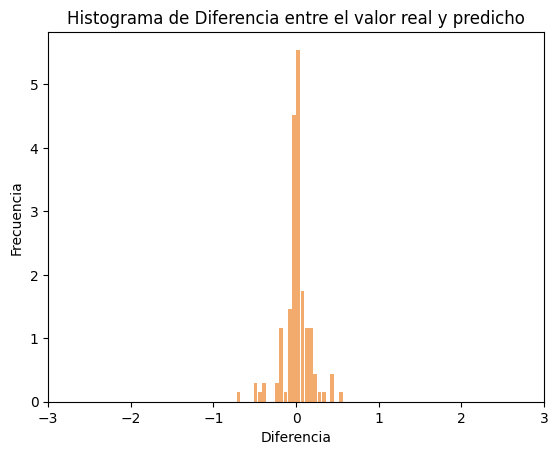

In [42]:
print('Primero vemos las metricas')
abr_score = model10.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model10.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model10.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

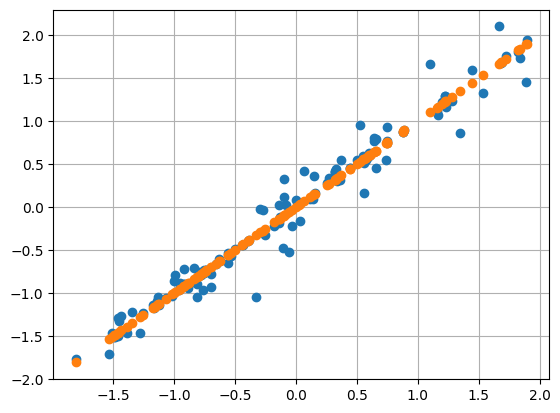

In [43]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show